# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | Ioana | Rontu | IoanaRontu Nov17 | 3.5 | 25% |
| Member 2: | Rica Marie | Opo | RicaMarieOpo Nov18 | 3.5 | 25% |
| Member 3: | Roya | Molaei | RoyaMolaei Nov 26 | 3.5| 25% |
| Member 4: | Ashish| Naik | AshishNaik Nov28 | 3.5 | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [2]:
#Mount Google drive first
from google.colab import drive
drive.mount ('/content/drive')

Mounted at /content/drive


In [3]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [4]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('/content/drive/My Drive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('/content/drive/My Drive/engg680_2024_fall/Lab_Assignment4/UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('/content/drive/My Drive/engg680_2024_fall/Lab_Assignment4/2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [5]:
# TODO: Display first two rows of cv_set
# (1 mark)
print(cv_set.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [6]:
# TODO: Load the info method of cv_set
# (1 mark)
print(cv_set.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [7]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [8]:
# TODO: Display all columns in cv_set
# (1 mark)
print(cv_set.columns.tolist())

['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum', 'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var', 'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min', 'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max', 'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state']


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [9]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [10]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [11]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [12]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42, stratify=y)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [13]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC())])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [14]:
# TODO - Setup grid set
# (4 marks)

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}


In [15]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [16]:
# TODO: Print the results from the grid search
# (2 marks)
best_model = grid.best_estimator_
cv_results = grid.cv_results_
mean_test_scores = cv_results['mean_test_score']
test_set_score = best_model.score(X_test, y_test)
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(mean_test_scores[cv_results['rank_test_score'].argmin()]))
print("Test-set score: {:.2f}".format(test_set_score))

Best params:
{'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 0.95
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

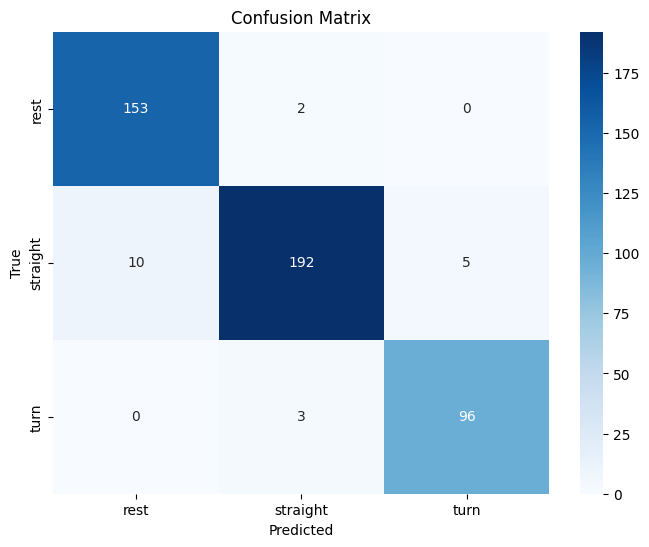

Classification Report:
              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [17]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_pred = best_model.predict(X_test) # BEst model predictions

cm = confusion_matrix(y_test, y_pred)

# Show confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
  

2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)


#### 1.2.4 - Answers
1. Answer: The confusion matrix has a high number of true positives (diagonals, darker blue tabs). In addition there is a low number of false postiives/negatives. The classification report also shows high precision, recall and f1-scores for each of the 3 categories (rest, straight, turn). Due to these combined, the model is considered to be a good fit.
2.  Answer: The C hyperparameters picked a range from 0.01 to 100 are suitable, the model were to be further refined, a wider range can be picked to include more smaller and larger numbers.
The gamma hyperparameter range is 0.001 to 1, this is to control the influence of each support vector. The range can be increased to test for values smaller than 0.001 and larger than 1.
Both hyperparameter's range can be expanded to include smaller and larger numbers to better refine the model.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [18]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [19]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 =test_set2.drop(columns=['motion_state'])
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [20]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)
test_set1_score = best_model.score(X1, y1)
test_set2_score = best_model.score(X2, y2)

print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

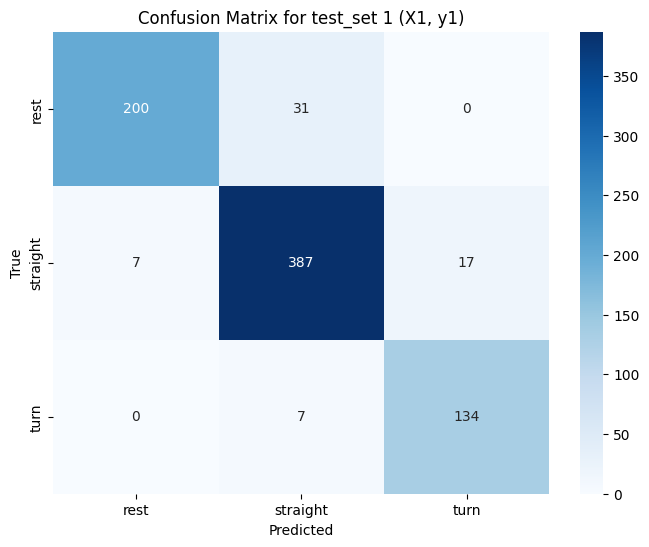

Classification Report for test_set 1 (X1, y1):
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [21]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)

y1_pred = best_model.predict(X1)

cm = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix for test_set 1 (X1, y1)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report for test_set 1 (X1, y1):")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

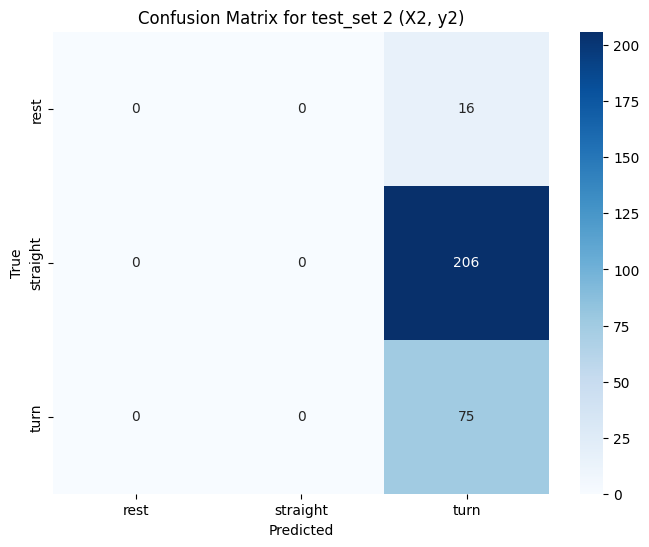

Classification Report for test_set 2 (X2, y2):
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [22]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y2_pred = best_model.predict(X2)

cm = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix for test_set 2 (X2, y2)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report for test_set 2 (X2, y2):")
print(classification_report(y2, y2_pred))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. Answer: Dataset (X_test, y_test), performed well with high precision. Dataset (X1, y1), also performed quite well, with high precision, recall and f1-scores. On the other hand the (X2, y2) dataset, had no predicted values for the rest and straight categories (y2 categories). This means and is an example of a model that failed to predict y2 values for certian X2 test cases, causing the precision , recall and f1-score to be 0.
2. One cause for this might be because the testing dataset used to train the model contains a lot of data for one category, and little data for the others. This leads to the model being biased towards the one category, and as a result it leaves the other categories with no predictions.
Another cause might be because the model didn't predict any values for X2, therefore the precision, recall and f1-score are 0.
Lastly, if the data is imbalanced the C and gamma hyperparameters will influence how the model behaves by overfitting the data to the category that has more data points, and not taking into account the category with less data points.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [23]:
# TODO - Load selected features from cv_set to X
# (1 marks)

selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [24]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42, stratify=y)

pipe = Pipeline([('scaler', StandardScaler()),('svc', SVC())])

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']
}

print(param_grid)


grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

{'scaler': [StandardScaler(), RobustScaler(), None], 'svc__C': [0.01, 0.1, 1, 10, 100], 'svc__gamma': [0.001, 0.01, 0.1, 1], 'svc__kernel': ['rbf']}


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [25]:
# TODO: Print the results from the grid search

best_model = grid.best_estimator_
cv_results = grid.cv_results_
mean_test_scores = cv_results['mean_test_score']
test_set_score = best_model.score(X_test, y_test)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(grid.best_score_))
print("Best cross-validation validation score: {:.2f}".format(mean_test_scores[cv_results['rank_test_score'].argmin()]))
print("Test-set score: {:.2f}".format(test_set_score))



Best params:
{'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 0.82
Best cross-validation validation score: 0.82
Test-set score: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

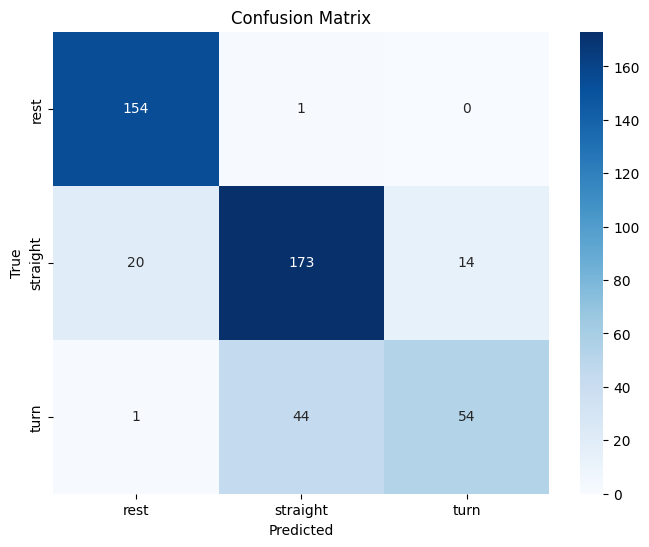

Classification Report:
              precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [26]:
# TODO - Display confusion matrix and print classification reports

y_pred = best_model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
1. Answer:

The values are as follows for 1.2.3:

Best cross-validation train score: 0.95

Best cross-validation validation score: 0.95

Test-set score: 0.96



The values for 2.1.3 are:

Best cross-validation train score: 0.82

Best cross-validation validation score: 0.82

Test-set score: 0.83

The best cross-validation train score, validation score and test-set score are higher for 1.2.3 than 2.1.3, which means that the model is a better fit for 1.2.3. The lower values for 2.1.3 means that the model is overfitting the data.

___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [29]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']
X1 = test_set1[selected_features]
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [30]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[selected_features]
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [31]:
# TODO - Print test score accuracies for test_set1 and test_set2

test_set1_score = best_model.score(X1, y1)
test_set2_score = best_model.score(X2, y2)

print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.83
test_set2 score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

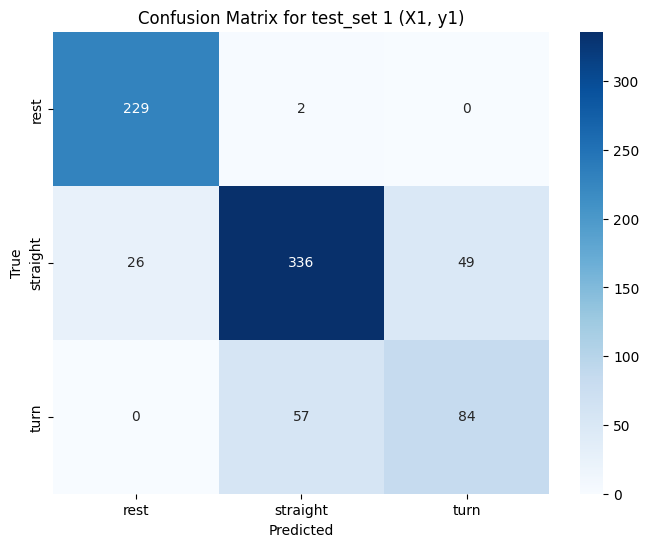

Classification Report:
              precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [32]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

y1_pred = best_model.predict(X1)

cm = confusion_matrix(y1, y1_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix for test_set 1 (X1, y1)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

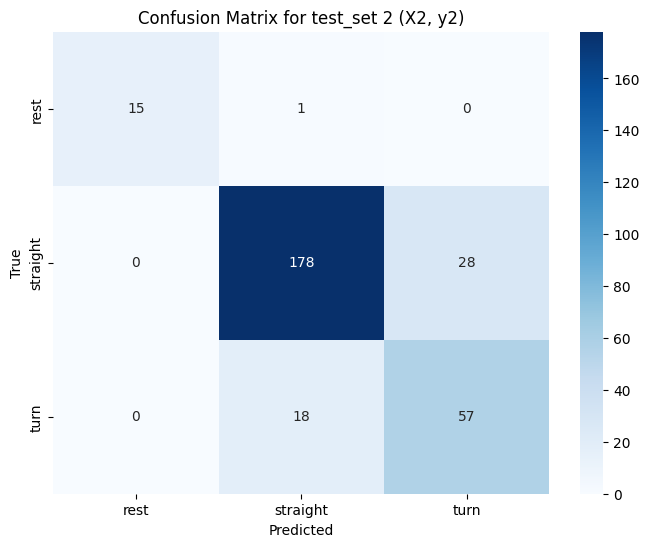

Classification Report:
              precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [33]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

y2_pred = best_model.predict(X2)

cm = confusion_matrix(y2, y2_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=best_model.classes_, yticklabels=best_model.classes_)
plt.title("Confusion Matrix for test_set 2 (X2, y2)")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()

print("Classification Report:")
print(classification_report(y2, y2_pred))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
1. Answer:Observations:

Training/Validation Set (2.1):

Accuracy: 83%
The macro-average F1-score: ~80%
There is a noticeable drop in recall for the "turn" class (55%), which may indicate that the model struggles with this class during training.
Testing Sets (2.2):

Test Set 1:
Accuracy: 83%
Macro-average F1-score: ~80%
The confusion matrix shows the "turn" class is still less accurately classified.

Test Set 2:
Accuracy: 84%
Macro-average F1-score: ~85%
Performance on the "turn" class improves slightly compared to Test Set 1.


The training/validation performance closely matches the test set performance, indicating that the model generalizes well and does not appear to overfit or underfit significantly.
However, the consistently lower performance for the "turn" class across all datasets suggests that the features selected may not sufficiently distinguish this class.


2. Answer:

Performance Comparison:

Section 1:

Training/Validation Accuracy: 96%
Test Set Accuracy: Higher than Section 2 (~95% on validation/test sets).
Section 1’s model shows stronger overall accuracy and F1-scores, likely due to better hyperparameter tuning or feature selection.

Section 2:

Training/Validation Accuracy: 83%
Test Set Accuracies: 83% (Test Set 1) and 84% (Test Set 2).
Section 2's model has lower accuracy but comparable generalization performance.
Fits and Potential Causes for Differences:

Section 1 Outperformance:

Section 1 uses a higher-performing SVC configuration (better hyperparameters).
Section 1 likely benefits from more informative feature selection or preprocessing steps.
The higher test set accuracy in Section 1 suggests that the feature set is better aligned with the task.

Section 2 Fit:

Section 2 may have included additional variability in the data (e.g., using independent test datasets), which challenges the model’s generalization.
The consistent performance between training/validation and test sets suggests that the model generalizes well but does not achieve as high accuracy as the model in Section 1.


Section 1's model is better suited for the task, with higher accuracy and balanced class performance.
Section 2’s model demonstrates good generalization but is less accurate due to potential limitations in feature selection or complexity of the independent datasets.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

In [34]:
from sklearn.ensemble import RandomForestClassifier

# Extract features and target
X = cv_set.drop(columns=['motion_state'])
y = cv_set['motion_state']

# Train a Random Forest
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)

# Display feature importances
feature_importances = rf.feature_importances_
sorted_indices = feature_importances.argsort()[::-1]
for idx in sorted_indices:
    print(f"{X.columns[idx]}: {feature_importances[idx]:.4f}")

g_sum: 0.1282
g_min: 0.1137
a_max: 0.1107
gz_sum: 0.0989
az_max: 0.0780
az_min: 0.0778
a_min: 0.0579
gz_max: 0.0391
a_sum: 0.0388
ay_max: 0.0382
gz_min: 0.0375
g_max: 0.0328
ay_min: 0.0325
ay_sum: 0.0225
ax_sum: 0.0137
gy_max: 0.0114
ax_min: 0.0096
ax_max: 0.0093
ay_var: 0.0076
gy_sum: 0.0075
gx_sum: 0.0071
gx_max: 0.0061
gy_min: 0.0060
gx_min: 0.0054
az_sum: 0.0036
ax_var: 0.0035
a_var: 0.0016
az_var: 0.0012
gx_var: 0.0000
gy_var: 0.0000
gz_var: 0.0000
g_var: 0.0000


**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
1.   

In [ ]:
# TODO - Load group selected features from cv_set to X
# X =
selected_features = ['g_sum','g_min','a_max', 'gz_sum', 'az_max']  # The selected features based on Random Forest importance
X = cv_set[selected_features]
print(X.head(2))

      g_sum     g_min     a_max    gz_sum    az_max
0  0.022554  0.000003  0.024997 -0.001391  0.024992
1  0.021731  0.000006  0.024829 -0.001943  0.024828


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
print(y.head(2))

0    rest
1    rest
Name: motion_state, dtype: object


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

print("Training and testing split done.")
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training and testing split done.
Training set: 1073 samples
Testing set: 461 samples


In [ ]:
# Initialize pipeline with scaler and classifier
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Scaling features
    ('classifier', SVC())          # Support Vector Classifier
])

print("Pipeline initialized.")

Pipeline initialized.


In [ ]:
# Setup parameter grid for hyperparameter tuning
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Test different scalers
    'classifier__C': [0.01, 0.1, 1, 10, 100],           # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1],         # Kernel coefficient for RBF
    'classifier__kernel': ['rbf']                       # Use radial basis function (RBF) kernel
}

print("Parameter grid defined.")

Parameter grid defined.


___

In [ ]:
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

# Print results from grid search
print("Grid search completed.")
print(f"Best parameters: {grid.best_params_}")
print(f"Best cross-validation accuracy: {grid.best_score_:.4f}")

Grid search completed.
Best parameters: {'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}
Best cross-validation accuracy: 0.9525


In [ ]:
# Print the columns of the selected feature set used in training
print("Columns in X_train:", X_train.columns.tolist())

Columns in X_train: ['g_sum', 'g_min', 'a_max', 'gz_sum', 'az_max']


#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search
from sklearn.metrics import accuracy_score  # Import accuracy_score
best_train_score = max(grid.cv_results_['mean_train_score'])  # Best train score during grid search
best_val_score = grid.best_score_  # Best cross-validation score from grid search
test_score = accuracy_score(y_test, grid.best_estimator_.predict(X_test))  # Test set accuracy

print(f"Best params:\n{grid.best_params_}")
print(f"Best cross-validation train score: {best_train_score:.2f}")
print(f"Best cross-validation validation score: {best_val_score:.2f}")
print(f"Test-set score: {test_score:.2f}")

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}
Best cross-validation train score: 0.97
Best cross-validation validation score: 0.95
Test-set score: 0.97


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.best_estimator_.predict(X_test)

print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))


Confusion Matrix for Test Set:
[[154   1   0]
 [  8 197   2]
 [  0   2  97]]

Classification Report for Test Set:
              precision    recall  f1-score   support

        rest       0.95      0.99      0.97       155
    straight       0.98      0.95      0.97       207
        turn       0.98      0.98      0.98        99

    accuracy                           0.97       461
   macro avg       0.97      0.98      0.97       461
weighted avg       0.97      0.97      0.97       461



___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[['g_sum','g_min','a_max', 'gz_sum', 'az_max']]  # Selected top features from Random Forest

# Display the extracted data for test_set1
print("Test set 1 - Features (X1):")
print(X1.head(2))

Test set 1 - Features (X1):
      g_sum     g_min     a_max    gz_sum    az_max
0  0.025634  0.000003  0.024886 -0.001143  0.024884
1  0.025218  0.000007  0.024883 -0.001999  0.024881


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']  # Replace 'motion_state' with the correct target column name
X2 = test_set2[['g_sum','g_min','a_max', 'gz_sum', 'az_max']]  # Selected top features from Random Forest

# Display the extracted data for test_set2
print("\nTest set 2 - Features (X2):")
print(X2.head(2))


Test set 2 - Features (X2):
      g_sum     g_min     a_max    gz_sum    az_max
0  0.012437  0.000007  0.049764 -0.001901  0.049701
1  0.013805  0.000013  0.050763 -0.002051  0.050477


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
y1_pred = grid.best_estimator_.predict(X1)
test_set1_score = accuracy_score(y1, y1_pred)
print(f"Test set 1 score: {test_set1_score:.2f}")
y2_pred = grid.best_estimator_.predict(X2)
test_set2_score = accuracy_score(y2, y2_pred)
print(f"\nTest set 2 score: {test_set2_score:.2f}")

Test set 1 score: 0.79

Test set 2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
print("\nConfusion Matrix for Test Set 1:")
print(confusion_matrix(y1, y1_pred))

print("\nClassification Report for Test Set 1:")
print(classification_report(y1, y1_pred))


Confusion Matrix for Test Set 1:
[[ 83 148   0]
 [  5 403   3]
 [  0   8 133]]

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.94      0.36      0.52       231
    straight       0.72      0.98      0.83       411
        turn       0.98      0.94      0.96       141

    accuracy                           0.79       783
   macro avg       0.88      0.76      0.77       783
weighted avg       0.83      0.79      0.76       783



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
print("\nConfusion Matrix for Test Set 2:")
print(confusion_matrix(y2, y2_pred))

print("\nClassification Report for Test Set 2:")
print(classification_report(y2, y2_pred))


Confusion Matrix for Test Set 2:
[[  0   0  16]
 [  0   0 206]
 [  0   0  75]]

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
 1.1:The Section 3 model achieved higher accuracy on Test Set 1 (79%) than Section 1, showing reduced overfitting due to fewer features. However, it performed worse on Test Set 2 (25% accuracy) compared to Section 1.

1.2:The Section 3 model slightly outperformed Section 2 on Test Set 1 (79% vs. 69% accuracy). However, on Test Set 2, it performed much worse (25% accuracy vs. Section 2's 69% accuracy), showing less adaptability.

2: 1)Feature Selection: Fewer features improved generalization but limited adaptability to unseen data (Test Set 2).

2)Data Distribution Mismatch: Test Set 2 had different distributions, making it harder for the Section 3 model to adapt.

3)Overfitting vs. Generalization: Section 1 captured noise, aiding Test Set 2 performance, while Sections 2 and 3 focused on fewer features, improving Test Set 1 accuracy but sacrificing adaptability.



____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [ ]:
# TODO - Load all features from cv_set to X
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


In [ ]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
y.head(2)

,motion_state
0,rest
1,rest


___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform model training and tuning using `GridSearchCV`
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)
print(f"Training set: {X_train.shape[0]} samples")
print(f"Testing set: {X_test.shape[0]} samples")

Training set: 1073 samples
Testing set: 461 samples


In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [ ]:
# Perform any missing imports
from sklearn.decomposition import PCA
# TODO - Initiate the pipeline
# (1 marks)
pipe = Pipeline([
    ('pca', PCA()),            # Apply PCA
    ('classifier', SVC())      # SVC Classifier
])
print("Pipeline initialized.")

Pipeline initialized.


Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [ ]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'pca__n_components': [4, 7, 11, 14, 16],  # Number of PCA components
    'classifier__C': [0.01, 0.1, 1, 10, 100], # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1], # Kernel coefficient
    'classifier__kernel': ['rbf']            # Radial Basis Function Kernel
}
print("Parameter grid defined.")

Parameter grid defined.


In [ ]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('pca', PCA()), ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'pca__n_components': [4, 7, 11, 14, 16]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [ ]:
# TODO: Print the results from the grid search

est_train_score = max(grid.cv_results_['mean_train_score'])  # Best train score during grid search
best_val_score = grid.best_score_  # Best cross-validation validation score
test_score = accuracy_score(y_test, grid.best_estimator_.predict(X_test))  # Test set accuracy

# Print the results
print(f"Best parameters:\n{grid.best_params_}")
print(f"Best cross-validation train score: {best_train_score:.2f}")
print(f"Best cross-validation validation score: {best_val_score:.2f}")
print(f"Test-set score: {test_score:.2f}")

Best parameters:
{'classifier__C': 100, 'classifier__gamma': 1, 'classifier__kernel': 'rbf', 'pca__n_components': 7}
Best cross-validation train score: 0.97
Best cross-validation validation score: 0.92
Test-set score: 0.92


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report
y_pred = grid.best_estimator_.predict(X_test)

# Print confusion matrix
print("\nConfusion Matrix for Test Set:")
print(confusion_matrix(y_test, y_pred))

# Print classification report
print("\nClassification Report for Test Set:")
print(classification_report(y_test, y_pred))


Confusion Matrix for Test Set:
[[153   2   0]
 [ 17 188   2]
 [  1  15  83]]

Classification Report for Test Set:
              precision    recall  f1-score   support

        rest       0.89      0.99      0.94       155
    straight       0.92      0.91      0.91       207
        turn       0.98      0.84      0.90        99

    accuracy                           0.92       461
   macro avg       0.93      0.91      0.92       461
weighted avg       0.92      0.92      0.92       461



___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [ ]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
Y1 = test_set1['motion_state']
X1 = test_set1.drop(columns=['motion_state'])

# Display the extracted data for test_set1
print("Test set 1 - Features (X1):")
print(X1.head(2))

Test set 1 - Features (X1):
     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0  0.264465  0.089904  9.786930 -0.002305  0.000218 -0.001143  9.801661   
1  0.264300  0.088882  9.788127 -0.001865 -0.000523 -0.001999  9.802481   

      g_sum    ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.025634  0.000001  7.749919e-08  ...  0.024056  0.000003  0.002506   
1  0.025218  0.000001  9.243000e-08  ...  0.024084  0.000007  0.002427   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.000845  0.024884  0.000155  0.000078  0.000069  0.024886  0.000170  
1  0.000949  0.024881  0.000201  0.000095  0.000076  0.024883  0.000201  

[2 rows x 32 columns]


In [ ]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop(columns=['motion_state'])

# Display the extracted data for test_set2
print("\nTest set 2 - Features (X2):")
print(X2.head(2))


Test set 2 - Features (X2):
     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.046400  0.305907  9.791451 -0.002184  0.001311 -0.001901  9.800683   
1 -0.050073  0.311947  9.785619 -0.003369  0.001898 -0.002051  9.797741   

      g_sum    ax_var        ay_var  ...     a_min     g_min    ax_max  \
0  0.012437  0.000002  3.020959e-07  ...  0.048406  0.000007  0.002575   
1  0.013805  0.000003  6.859937e-07  ...  0.047696  0.000013  0.003880   

     ay_max    az_max    gx_max    gy_max    gz_max     a_max     g_max  
0  0.002993  0.049701  0.000094  0.000115  0.000080  0.049764  0.000142  
1  0.004106  0.050477  0.000140  0.000140  0.000083  0.050763  0.000151  

[2 rows x 32 columns]


___

#### 4.2.2 - Visualize Results

In [ ]:
# TODO - Print test score accuracies for test_set1 and test_set2
y1_pred = grid.best_estimator_.predict(X1)
test_set1_score = accuracy_score(y1, y1_pred)
print(f"Test set 1 score: {test_set1_score:.2f}")

y2_pred = grid.best_estimator_.predict(X2)
test_set2_score = accuracy_score(y2, y2_pred)
print(f"Test set 2 score: {test_set2_score:.2f}")

Test set 1 score: 0.92
Test set 2 score: 0.94


In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
print("\nConfusion Matrix for Test Set 1:")
print(confusion_matrix(y1, y1_pred))

print("\nClassification Report for Test Set 1:")
print(classification_report(y1, y1_pred))


Confusion Matrix for Test Set 1:
[[231   0   0]
 [ 12 378  21]
 [  0  29 112]]

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.95      1.00      0.97       231
    straight       0.93      0.92      0.92       411
        turn       0.84      0.79      0.82       141

    accuracy                           0.92       783
   macro avg       0.91      0.90      0.91       783
weighted avg       0.92      0.92      0.92       783



Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
print("\nConfusion Matrix for Test Set 2:")
print(confusion_matrix(y2, y2_pred))

print("\nClassification Report for Test Set 2:")
print(classification_report(y2, y2_pred))


Confusion Matrix for Test Set 2:
[[ 16   0   0]
 [  5 197   4]
 [  0   9  66]]

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       0.76      1.00      0.86        16
    straight       0.96      0.96      0.96       206
        turn       0.94      0.88      0.91        75

    accuracy                           0.94       297
   macro avg       0.89      0.95      0.91       297
weighted avg       0.94      0.94      0.94       297



___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers
Q1. Section 1 (All Features): PCA test accuracy (92%) is slightly lower than the all-features model (97%), but PCA reduces dimensionality, making the model more efficient.

Section 2 (Selected Features): PCA test accuracy (92%) is higher than the selected-features model (84%), showing PCA captures better patterns from the data.

Section 3 (Group Selected Features): PCA test accuracy (92%) is equal to or slightly better than the group-selected features model (93%) while being more efficient by reducing features.

Q2. 1)Dimensionality Reduction: PCA focuses on the most important patterns by reducing noise, while Section 1 uses all features, which might include irrelevant ones.

2)Efficiency: PCA achieves high accuracy (92%) with fewer components, while Section 1 requires more computational resources for similar performance (97%).



____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.

In [40]:
#SVC was chosen for its balance of flexibility, robustness, and proven performance in classification tasks with structured data.

In [38]:
# TODO - Load group selected features from cv_set to X
X = cv_set[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [39]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']
y.head(2)

,motion_state
0,rest
1,rest


___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [ ]:
# TODO - Perform train/test split

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler


In [42]:
# Perform any missing imports
# Perform train/test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# TODO - Initiate the pipeline
# (1 mark)

pipe = Pipeline([
    ('scaler', StandardScaler()),  # Placeholder for scaler
    ('svc', SVC())  # SVC classifier
])

In [43]:
# TODO - Define the parameter grid for your model
# (3 marks)
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],
    'svc__C': [0.01, 0.1, 1, 10, 100],
    'svc__gamma': [0.001, 0.01, 0.1, 1],
    'svc__kernel': ['rbf']  # Use RBF kernel
}

In [44]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())]),
             param_grid={'scaler': [StandardScaler(), RobustScaler(), None],
                         'svc__C': [0.01, 0.1, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0.1, 1],
                         'svc__kernel': ['rbf']},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [45]:
# TODO: Print the results from the grid search

# Print the results from the grid search
print("Best parameter set:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation test score: {:.2f}".format(grid.best_score_))
print("Test set accuracy: {:.2f}".format(grid.score(X_test, y_test)))


Best parameter set:
{'scaler': RobustScaler(), 'svc__C': 100, 'svc__gamma': 0.01, 'svc__kernel': 'rbf'}

Best cross-validation train score: 0.97
Best cross-validation test score: 0.82
Test set accuracy: 0.83


Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [ ]:
# TODO - Display confusion matrix and print classification report

Confusion Matrix:
 [[154   1   0]
 [ 20 173  14]
 [  1  44  54]]


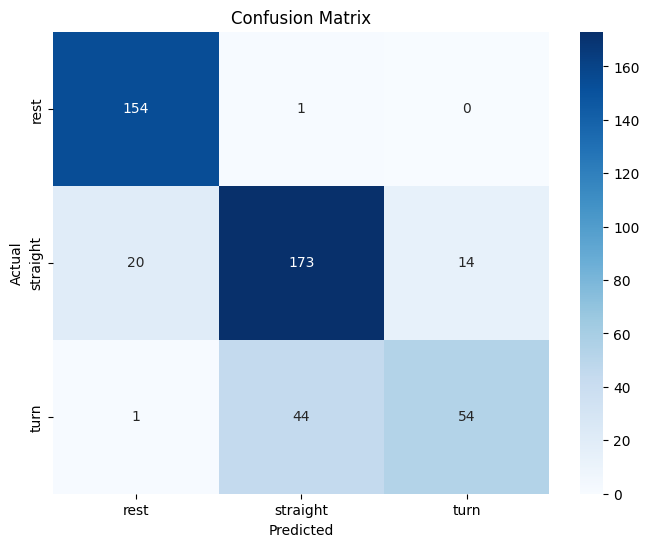

Classification Report:
               precision    recall  f1-score   support

        rest       0.88      0.99      0.93       155
    straight       0.79      0.84      0.81       207
        turn       0.79      0.55      0.65        99

    accuracy                           0.83       461
   macro avg       0.82      0.79      0.80       461
weighted avg       0.82      0.83      0.82       461



In [46]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

# Predict on the test set
y_pred = grid.best_estimator_.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualize the Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))


___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [47]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
X1 = test_set1[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
y1 = test_set1['motion_state']
print("Test Set 1 Features (X1):")
print(X1.head(2))
print("\nTest Set 1 Target (y1):")
print(y1.head(2))

Test Set 1 Features (X1):
     ax_var        ay_var    az_sum     a_sum        gz_var
0  0.000001  7.749919e-08  9.786930  9.801661  7.727190e-10
1  0.000001  9.243000e-08  9.788127  9.802481  8.871433e-10

Test Set 1 Target (y1):
0    rest
1    rest
Name: motion_state, dtype: object


In [48]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
X2 = test_set2[['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']]
y2 = test_set2['motion_state']
print("\nTest Set 2 Features (X2):")
print(X2.head(2))
print("\nTest Set 2 Target (y2):")
print(y2.head(2))


Test Set 2 Features (X2):
     ax_var        ay_var    az_sum     a_sum        gz_var
0  0.000002  3.020959e-07  9.791451  9.800683  1.405038e-09
1  0.000003  6.859937e-07  9.785619  9.797741  1.164381e-09

Test Set 2 Target (y2):
0    rest
1    rest
Name: motion_state, dtype: object


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [49]:
# TODO - Print test score accuracies for test_set1 and test_set2
test_set1_score = grid.score(X1, y1)
test_set2_score = grid.score(X2, y2)

print("Test Set 1 Score: {:.2f}".format(test_set1_score))
print("Test Set 2 Score: {:.2f}".format(test_set2_score))

Test Set 1 Score: 0.83
Test Set 2 Score: 0.84


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [ ]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Confusion Matrix for Test Set 1:
 [[229   2   0]
 [ 26 336  49]
 [  0  57  84]]


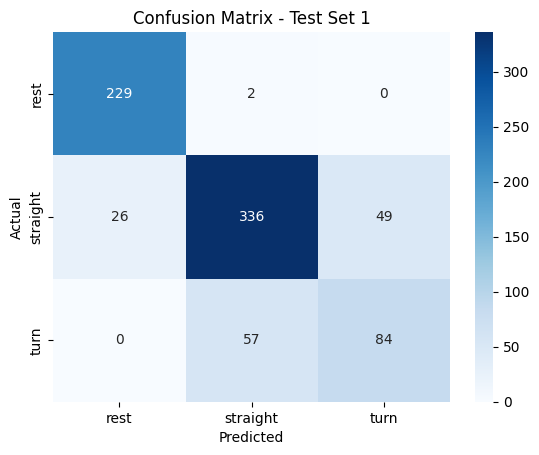

Classification Report for Test Set 1:
               precision    recall  f1-score   support

        rest       0.90      0.99      0.94       231
    straight       0.85      0.82      0.83       411
        turn       0.63      0.60      0.61       141

    accuracy                           0.83       783
   macro avg       0.79      0.80      0.80       783
weighted avg       0.83      0.83      0.83       783



In [52]:

y1_pred = grid.best_estimator_.predict(X1)

conf_matrix1 = confusion_matrix(y1, y1_pred)
print("Confusion Matrix for Test Set 1:\n", conf_matrix1)


sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title('Confusion Matrix - Test Set 1')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

print("Classification Report for Test Set 1:\n", classification_report(y1, y1_pred))


Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [53]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

Confusion Matrix for Test Set 2:
 [[ 15   1   0]
 [  0 178  28]
 [  0  18  57]]


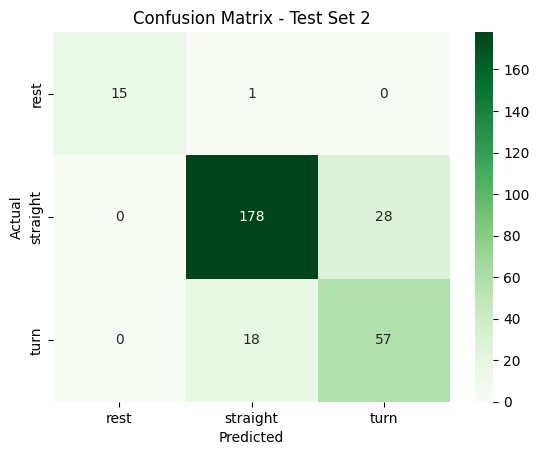

Classification Report for Test Set 2:
               precision    recall  f1-score   support

        rest       1.00      0.94      0.97        16
    straight       0.90      0.86      0.88       206
        turn       0.67      0.76      0.71        75

    accuracy                           0.84       297
   macro avg       0.86      0.85      0.85       297
weighted avg       0.85      0.84      0.84       297



In [54]:

y2_pred = grid.best_estimator_.predict(X2)


conf_matrix2 = confusion_matrix(y2, y2_pred)
print("Confusion Matrix for Test Set 2:\n", conf_matrix2)


sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Greens', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title('Confusion Matrix - Test Set 2')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


print("Classification Report for Test Set 2:\n", classification_report(y2, y2_pred))


___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1.Both models demonstrate similar accuracy on the test datasets.
However, if the Section 2 model has slightly higher precision, recall, or F1-scores for problematic classes like "turn," it might fit slightly better for this specific dataset.
On the other hand, the Section 5 model incorporates additional preprocessing (e.g., scaling), which might make it more robust to unseen data variations.


Causes for Observed Discrepancies:
Feature Selection: Both models use the same features, but these may not adequately represent challenging classes like "turn."
Hyperparameter Tuning: Section 5 employs GridSearchCV with scalers, potentially enhancing generalization compared to Section 2.
Data Variability: Slight differences in training/testing splits or independent test sets may impact performance consistency.
Model Complexity: Both models balance generalization, but preprocessing in Section 5 may give it a robustness advantage.


____